## importar librerías

In [21]:
import pandas as pd #para manejar el dataframe
import numpy as np #para abrir el csv
import matplotlib.pyplot as plt #para graficar 
from sklearn.cluster import KMeans #para clasificar los datos
import sklearn as sk #para normalizar los datos

## cargar base de datos 

In [22]:
path='C:/Users/MALIK/Documents/ProgramaDelfin/usuario99-0.csv'
df1 = pd.read_csv(path,encoding='latin',low_memory=False)
df1.head()

,VIV_SEL,HOGAR,N_REN,P6_1,P6_3,P7_1,P7_3,P7_4,P7_5_1,P7_5_2,...,P8_5,P8_6_1,P8_6_2,P8_8,P8_9,P8_10_1,P8_10_2,CD_ENDUTIH,ENT,P8_7r
0,1,1,4,2,6,1,1,3,2,2,...,1,1,2,1,1,1,1,14,1,2
1,2,1,1,2,3,2,6,13,3,3,...,1,1,2,1,2,3,3,14,1,1
2,3,1,1,1,7,1,3,13,2,2,...,2,1,2,1,3,3,3,14,1,1
3,4,1,1,1,7,1,1,5,2,1,...,1,2,1,1,1,1,1,14,1,2
4,4,2,1,1,7,1,1,6,2,1,...,1,2,1,1,1,1,1,14,1,2


## normalizar los datos 

In [23]:
X = sk.preprocessing.normalize(df1, norm='l2', axis=1, copy=True)
X

array([[0.04207032, 0.04207032, 0.16828126, ..., 0.58898443, 0.04207032,
        0.08414063],
       [0.06008418, 0.03004209, 0.03004209, ..., 0.42058924, 0.03004209,
        0.03004209],
       [0.10078697, 0.03359566, 0.03359566, ..., 0.4703392 , 0.03359566,
        0.03359566],
       ...,
       [0.04633343, 0.01158336, 0.03475007, ..., 0.82241834, 0.37066742,
        0.18533371],
       [0.215742  , 0.01135484, 0.03406453, ..., 0.80619379, 0.36335495,
        0.18167747],
       [0.1422736 , 0.01185613, 0.01185613, ..., 0.84178546, 0.37939626,
        0.02371227]])

## gráfica de elbow

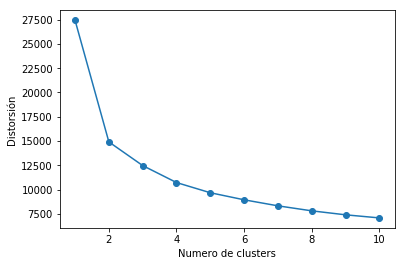

In [24]:
distortions = []

for i in range(1,11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Numero de clusters')
plt.ylabel('Distorsión')
plt.show()

In [25]:
clusters = KMeans(n_clusters=4,
                    init='k-means++', 
                    max_iter=300,
                    tol=1e-04,
                    n_init=10,
                    random_state=0)  

print(np.unique(clusters.fit_predict(X)))

[0 1 2 3]


## gráficar los clusters

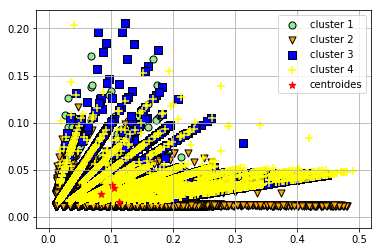

In [26]:
y_km = clusters.fit_predict(X)
plt.scatter(X[y_km==0,0],
          X[y_km==0,1],
          s=50,
          c='lightgreen',
          edgecolor='black',
          marker='o',
          label='cluster 1')
plt.scatter(X[y_km==1,0],
          X[y_km==1,1],
          s=50,
          c='orange',
          edgecolor='black',
          marker='v',
          label='cluster 2')
plt.scatter(X[y_km==2,0],
          X[y_km==2,1],
          s=50,
          c='blue',
          edgecolor='black',
          marker='s',
          label='cluster 3')
plt.scatter(X[y_km==3,0],
          X[y_km==3,1],
          s=50,
          c='yellow',
          edgecolor='black',
          marker='+',
          label='cluster 4')

plt.scatter(clusters.cluster_centers_[:,0],
          clusters.cluster_centers_[:,1],
          s=50,
          c='red',
          marker='*',
          label='centroides')


plt.legend()
plt.grid()
plt.show()

## hacer un copia del dataset

In [27]:
self=df1

In [28]:
self

,VIV_SEL,HOGAR,N_REN,P6_1,P6_3,P7_1,P7_3,P7_4,P7_5_1,P7_5_2,...,P8_5,P8_6_1,P8_6_2,P8_8,P8_9,P8_10_1,P8_10_2,CD_ENDUTIH,ENT,P8_7r
0,1,1,4,2,6,1,1,3,2,2,...,1,1,2,1,1,1,1,14,1,2
1,2,1,1,2,3,2,6,13,3,3,...,1,1,2,1,2,3,3,14,1,1
2,3,1,1,1,7,1,3,13,2,2,...,2,1,2,1,3,3,3,14,1,1
3,4,1,1,1,7,1,1,5,2,1,...,1,2,1,1,1,1,1,14,1,2
4,4,2,1,1,7,1,1,6,2,1,...,1,2,1,1,1,1,1,14,1,2
5,4,3,1,1,7,1,1,12,2,1,...,1,2,1,1,1,1,1,14,1,3
6,4,4,1,1,7,1,1,12,2,1,...,1,2,1,1,1,1,1,14,1,3
7,1,1,2,2,2,2,6,13,3,3,...,5,3,3,3,3,3,3,14,1,16
8,2,1,1,1,7,1,1,10,1,2,...,1,1,2,1,1,1,1,14,1,2
9,3,1,1,1,7,1,1,6,2,1,...,1,2,1,1,1,1,1,14,1,2


## aplicar PCA

In [29]:
from sklearn import decomposition

In [30]:
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)


## volver a graficar los clusters 

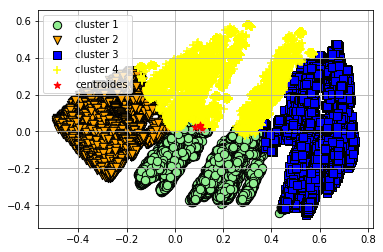

In [31]:

plt.scatter(X[y_km==0,0],
          X[y_km==0,1],
          s=70,
          c='lightgreen',
          edgecolor='black',
          marker='o',
          label='cluster 1')
plt.scatter(X[y_km==1,0],
          X[y_km==1,1],
          s=70,
          c='orange',
          edgecolor='black',
          marker='v',
          label='cluster 2')
plt.scatter(X[y_km==2,0],
          X[y_km==2,1],
          s=70,
          c='blue',
          edgecolor='black',
          marker='s',
          label='cluster 3')
plt.scatter(X[y_km==3,0],
          X[y_km==3,1],
          s=70,
          c='yellow',
          edgecolor='black',
          marker='+',
          label='cluster 4')

plt.scatter(clusters.cluster_centers_[:,0],
          clusters.cluster_centers_[:,1],
          s=50,
          c='red',
          marker='*',
          label='centroides')

plt.legend()
plt.grid()
plt.show()

## agregar la columna "cluster" al dataset 

In [32]:
self['cluster']=clusters.fit_predict(X)

In [33]:
self

,VIV_SEL,HOGAR,N_REN,P6_1,P6_3,P7_1,P7_3,P7_4,P7_5_1,P7_5_2,...,P8_6_1,P8_6_2,P8_8,P8_9,P8_10_1,P8_10_2,CD_ENDUTIH,ENT,P8_7r,cluster
0,1,1,4,2,6,1,1,3,2,2,...,1,2,1,1,1,1,14,1,2,1
1,2,1,1,2,3,2,6,13,3,3,...,1,2,1,2,3,3,14,1,1,1
2,3,1,1,1,7,1,3,13,2,2,...,1,2,1,3,3,3,14,1,1,1
3,4,1,1,1,7,1,1,5,2,1,...,2,1,1,1,1,1,14,1,2,1
4,4,2,1,1,7,1,1,6,2,1,...,2,1,1,1,1,1,14,1,2,1
5,4,3,1,1,7,1,1,12,2,1,...,2,1,1,1,1,1,14,1,3,1
6,4,4,1,1,7,1,1,12,2,1,...,2,1,1,1,1,1,14,1,3,1
7,1,1,2,2,2,2,6,13,3,3,...,3,3,3,3,3,3,14,1,16,1
8,2,1,1,1,7,1,1,10,1,2,...,1,2,1,1,1,1,14,1,2,1
9,3,1,1,1,7,1,1,6,2,1,...,2,1,1,1,1,1,14,1,2,1


In [34]:
self.cluster.value_counts()

2    71577
0    26190
3    19394
1    18180
Name: cluster, dtype: int64

In [35]:
self['cluster'].isnull().any().any()


False

## exportar la nueva base de datos como csv

In [37]:
self.to_csv('C:/Users/MALIK/Documents/ProgramaDelfin/UsuarioKMeansCluster.csv',index=False)

## Importar librerías 

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt #para graficar 
from sklearn.cluster import KMeans #para clasificar los datos
import sklearn as sk #para normalizar los datos

## cargar la base de datos

In [2]:
path='C:/Users/MALIK/Documents/ProgramaDelfin/usuario99-0.csv'
df2 = pd.read_csv(path,encoding='latin',low_memory=False)
df2.head()

,VIV_SEL,HOGAR,N_REN,P6_1,P6_3,P7_1,P7_3,P7_4,P7_5_1,P7_5_2,...,P8_5,P8_6_1,P8_6_2,P8_8,P8_9,P8_10_1,P8_10_2,CD_ENDUTIH,ENT,P8_7r
0,1,1,4,2,6,1,1,3,2,2,...,1,1,2,1,1,1,1,14,1,2
1,2,1,1,2,3,2,6,13,3,3,...,1,1,2,1,2,3,3,14,1,1
2,3,1,1,1,7,1,3,13,2,2,...,2,1,2,1,3,3,3,14,1,1
3,4,1,1,1,7,1,1,5,2,1,...,1,2,1,1,1,1,1,14,1,2
4,4,2,1,1,7,1,1,6,2,1,...,1,2,1,1,1,1,1,14,1,2


In [3]:
df_sample=df2.sample(frac=0.05, random_state=1)
df_sample.head()

,VIV_SEL,HOGAR,N_REN,P6_1,P6_3,P7_1,P7_3,P7_4,P7_5_1,P7_5_2,...,P8_5,P8_6_1,P8_6_2,P8_8,P8_9,P8_10_1,P8_10_2,CD_ENDUTIH,ENT,P8_7r
126475,9,1,2,1,2,2,6,13,3,3,...,2,1,2,1,3,3,3,71,30,1
109706,2,1,2,2,2,2,6,13,3,3,...,2,1,2,2,3,3,3,10,28,1
85061,10,1,3,2,2,1,2,13,2,2,...,5,3,3,3,3,3,3,62,21,16
20199,4,1,2,2,6,2,6,13,3,3,...,5,3,3,3,3,3,3,71,5,16
32125,5,1,1,2,5,2,6,13,3,3,...,2,1,2,1,2,3,3,20,8,1


## normalizar los datos 

In [5]:
X= sk.preprocessing.normalize(df_sample, norm='l2', axis=1, copy=True)


## Aplicar el algoritmo DBSCAN

In [6]:
# Compute DBSCAN
db = DBSCAN(eps=0.2, min_samples=20).fit(X)
labels = db.labels_

In [7]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4], dtype=int64)

## imprimir la cantidad de clusters

In [8]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 5


In [9]:
y_db=db.fit_predict(X)

## graficar los clusters

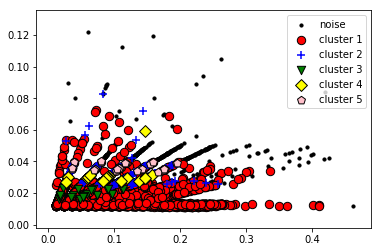

In [10]:
plt.scatter(X[y_db==-1,0],
            X[y_db==-1,1],
            c='black',
            edgecolor='black',
            marker='.',
            s=40,
            label='noise')
plt.scatter(X[y_db==0,0],
            X[y_db==0,1],
            c='r',
            edgecolor='black',
            marker='o',
            s=70,
            label='cluster 1')
plt.scatter(X[y_db==1,0],
            X[y_db==1,1],
            c='blue',
            edgecolor='black',
            marker='+',
            s=70,
            label='cluster 2')
plt.scatter(X[y_db==2,0],
            X[y_db==2,1],
            c='green',
            edgecolor='black',
            marker='v',
            s=70,
            label='cluster 3')
plt.scatter(X[y_db==3,0],
            X[y_db==3,1],
            c='yellow',
            edgecolor='black',
            marker='D',
            s=70,
            label='cluster 4')
plt.scatter(X[y_db==4,0],
            X[y_db==4,1],
            c='pink',
            edgecolor='black',
            marker='p',
            s=70,
            label='cluster 5')




plt.legend()
plt.show()


## Aplicar PCA a DBSCAN

In [11]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

## Graficar los clusters

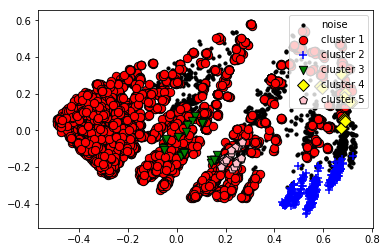

In [12]:
plt.scatter(X[y_db==-1,0],
            X[y_db==-1,1],
            c='black',
            edgecolor='black',
            marker='.',
            s=40,
            label='noise')
plt.scatter(X[y_db==0,0],
            X[y_db==0,1],
            c='r',
            edgecolor='black',
            marker='o',
            s=70,
            label='cluster 1')
plt.scatter(X[y_db==1,0],
            X[y_db==1,1],
            c='blue',
            edgecolor='black',
            marker='+',
            s=70,
            label='cluster 2')
plt.scatter(X[y_db==2,0],
            X[y_db==2,1],
            c='green',
            edgecolor='black',
            marker='v',
            s=70,
            label='cluster 3')
plt.scatter(X[y_db==3,0],
            X[y_db==3,1],
            c='yellow',
            edgecolor='black',
            marker='D',
            s=70,
            label='cluster 4')
plt.scatter(X[y_db==4,0],
            X[y_db==4,1],
            c='pink',
            edgecolor='black',
            marker='p',
            s=70,
            label='cluster 5')




plt.legend()
plt.show()